In [ ]:
import os
from PIL import Image
import numpy as np

In [ ]:
import os
from PIL import Image

# Define dataset path
dataset_path = "/content/drive/MyDrive/OralCancer"  # Update if needed

# Function to get dataset information
def get_dataset_info(dataset_path):
    categories = os.listdir(dataset_path)
    data_info = {}

    for category in categories:
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            num_images = len(image_files)

            # Get image sizes (taking first image as reference)
            if num_images > 0:
                img_path = os.path.join(category_path, image_files[0])
                with Image.open(img_path) as img:
                    width, height = img.size
                    mode = img.mode  # Color mode (RGB, Grayscale, etc.)

            else:
                width, height, mode = None, None, None

            data_info[category] = {
                "num_images": num_images,
                "sample_image_size": (width, height),
                "color_mode": mode
            }

    return data_info

# Get dataset info
dataset_info = get_dataset_info(dataset_path)

# Print dataset information
for category, info in dataset_info.items():
    print(f"Class: {category}")
    print(f"  Number of images: {info['num_images']}")
    print(f"  Sample image size: {info['sample_image_size']}")
    print(f"  Color mode: {info['color_mode']}")
    print("-" * 40)


Class: cancer
  Number of images: 87
  Sample image size: (864, 1152)
  Color mode: RGB
----------------------------------------
Class: non-cancer
  Number of images: 44
  Sample image size: (1233, 834)
  Color mode: RGB
----------------------------------------


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

# Define dataset path
dataset_path = "/content/drive/MyDrive/OralCancer"

# Count images in each class
class_counts = {}
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_images = len([f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[category] = num_images

# Print class distribution
print("Class Distribution:", class_counts)


Class Distribution: {'cancer': 87, 'non-cancer': 44}


In [ ]:
import cv2
from collections import Counter

# Store image shapes
image_shapes = []

# Loop through images and get their shapes
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(category_path, img_file)
                img = cv2.imread(img_path)  # Read image
                if img is not None:
                    image_shapes.append(img.shape)  # Store shape (height, width, channels)

# Count unique shapes
shape_counts = Counter(image_shapes)

# Print image shape statistics
print("\nUnique Image Shapes:")
for shape, count in shape_counts.items():
    print(f"  {shape}: {count} images")



Unique Image Shapes:
  (1152, 864, 3): 1 images
  (1280, 913, 3): 1 images
  (279, 375, 3): 2 images
  (299, 339, 3): 1 images
  (400, 800, 3): 1 images
  (522, 458, 3): 1 images
  (500, 700, 3): 1 images
  (350, 540, 3): 2 images
  (1066, 740, 3): 1 images
  (237, 354, 3): 2 images
  (283, 313, 3): 2 images
  (536, 742, 3): 2 images
  (1280, 622, 3): 1 images
  (225, 225, 3): 3 images
  (675, 1080, 3): 1 images
  (360, 480, 3): 1 images
  (467, 698, 3): 2 images
  (312, 380, 3): 2 images
  (826, 1100, 3): 1 images
  (618, 1100, 3): 5 images
  (546, 728, 3): 2 images
  (222, 294, 3): 2 images
  (211, 239, 3): 1 images
  (184, 274, 3): 1 images
  (191, 288, 3): 1 images
  (301, 339, 3): 2 images
  (185, 273, 3): 1 images
  (887, 850, 3): 1 images
  (1296, 1936, 3): 2 images
  (556, 738, 3): 2 images
  (180, 280, 3): 1 images
  (788, 1400, 3): 1 images
  (810, 1200, 3): 3 images
  (365, 675, 3): 1 images
  (361, 642, 3): 2 images
  (432, 632, 3): 1 images
  (415, 620, 3): 3 images
  (30

In [ ]:
import cv2
import numpy as np

img_size = (224, 224)  # Target image size

# Create folder for resized images (optional)
resized_dataset_path = "/content/resized_oral_cancer"
os.makedirs(resized_dataset_path, exist_ok=True)

# Resize and save images
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    save_path = os.path.join(resized_dataset_path, category)
    os.makedirs(save_path, exist_ok=True)  # Create class folder

    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(category_path, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img_resized = cv2.resize(img, img_size)
                    cv2.imwrite(os.path.join(save_path, img_file), img_resized)  # Save resized image

print("Image resizing complete. Resized dataset saved at:", resized_dataset_path)


Image resizing complete. Resized dataset saved at: /content/resized_oral_cancer


In [ ]:
import os
import cv2
import numpy as np

# Function to normalize images
def normalize_images(dataset_path, save_path):
    os.makedirs(save_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        category_save_path = os.path.join(save_path, category)
        os.makedirs(category_save_path, exist_ok=True)

        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path).astype(np.float32) / 255.0  # Normalize to 0-1
                    img = (img * 255).astype(np.uint8)  # Convert back for saving
                    cv2.imwrite(os.path.join(category_save_path, img_file), img)

# Define dataset path and save path
dataset_path = "/content/resized_oral_cancer"  # Change this to your actual dataset path
normalized_dataset_path = "/content/normalized_oral_cancer"

# Run normalization
normalize_images(dataset_path, normalized_dataset_path)

print("Normalization complete. Normalized images saved at:", normalized_dataset_path)


Normalization complete. Normalized images saved at: /content/normalized_oral_cancer


In [ ]:
import os
import random
import shutil
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/resized_oral_cancer"
augmented_path = "/content/augmented_oral_cancer"
os.makedirs(augmented_path, exist_ok=True)

# Function to count images in each class
def count_images(path):
    class_counts = {cls: len(os.listdir(os.path.join(path, cls))) for cls in os.listdir(path)}
    return class_counts

# 1️⃣ **Before Augmentation: Print Original Data Stats**
original_counts = count_images(dataset_path)
print("\nClass Distribution Before Augmentation:")
for cls, count in original_counts.items():
    print(f"  {cls}: {count} images")
print("----------------------------------------")

# 2️⃣ **Oversampling: Balance the dataset**
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    save_path = os.path.join(augmented_path, category)
    os.makedirs(save_path, exist_ok=True)

    images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Copy existing images
    for img in images:
        shutil.copy(os.path.join(category_path, img), os.path.join(save_path, img))

    # Duplicate minority class images until balanced
    if len(images) < 87:
        extra_needed = 87 - len(images)
        for i in range(extra_needed):
            img_to_copy = random.choice(images)
            new_filename = f"copy_{i}_{img_to_copy}"
            shutil.copy(os.path.join(category_path, img_to_copy), os.path.join(save_path, new_filename))

# 3️⃣ **After Oversampling: Print Stats**
oversampled_counts = count_images(augmented_path)
print("\nClass Distribution After Oversampling:")
for cls, count in oversampled_counts.items():
    print(f"  {cls}: {count} images")
print("----------------------------------------")

# 4️⃣ **Augmentation**
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    augmented_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# 5️⃣ **After Augmentation: Print Generated Data Stats**
augmented_counts = {cls: train_generator.samples for cls in train_generator.class_indices.keys()}
print("\nClass Distribution After Augmentation (Generated Batch Samples):")
for cls, count in augmented_counts.items():
    print(f"  {cls}: {count} augmented samples")
print("----------------------------------------")



Class Distribution Before Augmentation:
  non-cancer: 44 images
  cancer: 87 images
----------------------------------------

Class Distribution After Oversampling:
  non-cancer: 87 images
  cancer: 87 images
----------------------------------------
Found 140 images belonging to 2 classes.

Class Distribution After Augmentation (Generated Batch Samples):
  cancer: 140 augmented samples
  non-cancer: 140 augmented samples
----------------------------------------


In [ ]:
# Define dataset path
dataset_path = "/content/augmented_oral_cancer"

# Count images in each class
class_counts = {}
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_images = len([f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[category] = num_images

# Print class distribution
print("Class Distribution:", class_counts)


Class Distribution: {'non-cancer': 87, 'cancer': 87}


In [ ]:
import os
import shutil
import random

# Paths
dataset_path = "/content/augmented_oral_cancer"
train_path = "/content/train"
test_path = "/content/test"

# Create train & test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Create class folders in train & test directories
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

    # Get list of all images in category
    images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Shuffle images randomly
    random.shuffle(images)

    # Split 80% Train - 20% Test
    split_idx = int(0.8 * len(images))
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Move images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_path, category, img))

    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_path, category, img))

print("Dataset successfully split into Training and Testing sets!")


Dataset successfully split into Training and Testing sets!


In [ ]:
def count_images_in_folder(folder_path):
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        print(f"Class: {category}, Images: {len(os.listdir(category_path))}")

print("\nTraining Set Distribution:")
count_images_in_folder(train_path)

print("\nTesting Set Distribution:")
count_images_in_folder(test_path)



Training Set Distribution:
Class: non-cancer, Images: 85
Class: cancer, Images: 83

Testing Set Distribution:
Class: non-cancer, Images: 34
Class: cancer, Images: 32


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_path = "/content/train"
test_path = "/content/test"

# Data augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixels (0-1)
    validation_split=0.2  # 80% training, 20% validation
)

# Training Data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation Data
val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 135 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [ ]:
# Load pre-trained MobileNetV2 (without top layers)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze the base model (do not train)
base_model.trainable = False

# Custom Layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7525 - loss: 0.5337 - val_accuracy: 0.9394 - val_loss: 0.2305
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8773 - loss: 0.3167 - val_accuracy: 0.9697 - val_loss: 0.2078
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9580 - loss: 0.1653 - val_accuracy: 0.9697 - val_loss: 0.1814
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9791 - loss: 0.1149 - val_accuracy: 0.9697 - val_loss: 0.1758
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9827 - loss: 0.0803 - val_accuracy: 0.9697 - val_loss: 0.1886


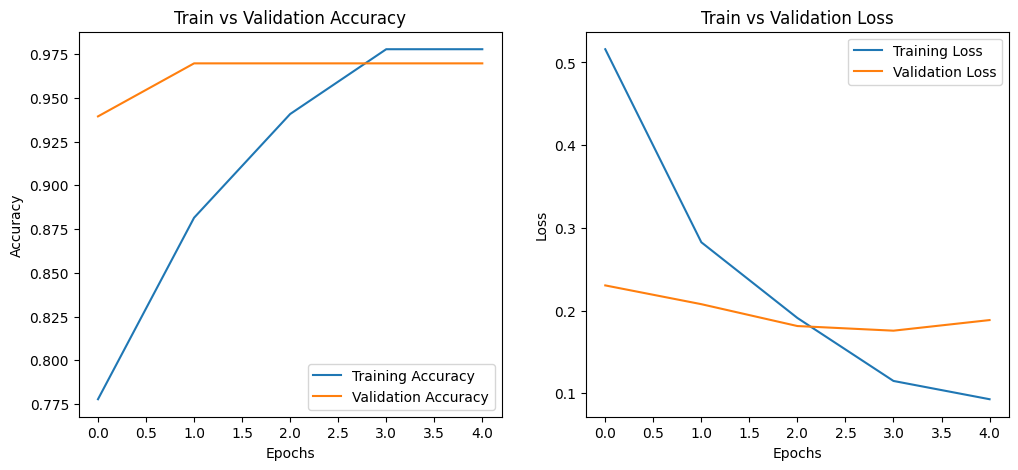

In [ ]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

# Plot Training vs Validation Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

plt.show()


In [ ]:
# Training Accuracy (last epoch)
train_acc = history.history['accuracy'][-1] * 100

# Validation Accuracy (last epoch)
val_acc = history.history['val_accuracy'][-1] * 100

# Test Accuracy
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
loss, test_acc = model.evaluate(test_generator)
test_acc = test_acc * 100

# Print Accuracy Report
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Validation Accuracy: {val_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
#Training Accuracy is much higher than Validation & Test Accuracy is over fit

Found 66 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 922ms/step - accuracy: 0.9885 - loss: 0.0992
Training Accuracy: 97.78%
Validation Accuracy: 96.97%
Test Accuracy: 98.48%


In [ ]:
# Training Loss (last epoch)
train_loss = history.history['loss'][-1]

# Validation Loss (last epoch)
val_loss = history.history['val_loss'][-1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
#Training Loss is very low, but Validation Loss is high

Training Loss: 0.0929
Validation Loss: 0.1886


In [ ]:
train_acc = history.history['accuracy'][-1]  # Last epoch training accuracy
val_acc = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

generalization_gap = abs(train_acc - val_acc)

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Validation Accuracy: {val_acc:.2%}")
print(f"Generalization Gap: {generalization_gap:.2%}")

# Rule of Thumb:
# - Gap < 5% → Good generalization
# - Gap 5-10% → Possible overfitting
# - Gap > 10% → Likely overfitting


Training Accuracy: 97.78%
Validation Accuracy: 96.97%
Generalization Gap: 0.81%


In [ ]:
import keras.saving


keras.saving.save_model(model, "/content/drive/MyDrive/mobilenetv2_oral_cancer.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


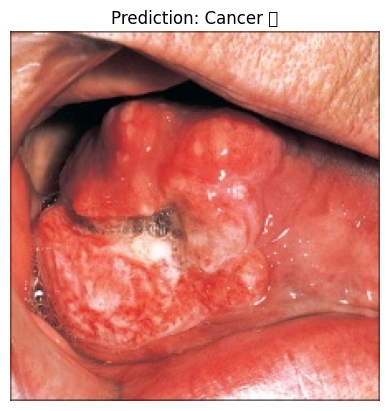

🩸 Prediction: Cancer Detected


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def predict_image(img_path, model):
    # Check if file exists
    if not os.path.exists(img_path):
        print(f"❌ Error: File '{img_path}' not found.")
        return

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Get prediction score

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: Cancer 🩸" if prediction < 0.5 else "Prediction: Non-Cancer ✅")
    plt.show()

    # Print prediction result
    if prediction < 0.5:
        print("🩸 Prediction: Cancer Detected")
    else:
        print("✅ Prediction: Non-Cancer")

# Example: Predict a new image
img_path = "/content/train/cancer/3-s2.0-B9780443100734500148-f10-07-9780443100734.jpg"  # Fixed missing quote
predict_image(img_path, model)  # Fixed misplaced comma


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


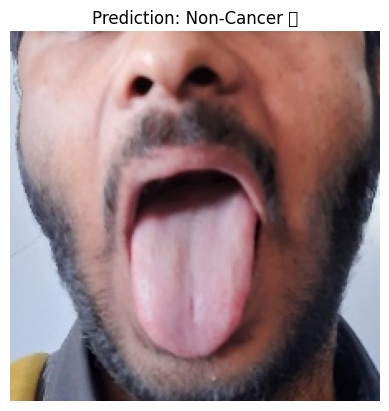

✅ Prediction: Non-Cancer


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to MobileNetV2 input size
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Get prediction score

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: Cancer 🩸" if prediction < 0.5 else "Prediction: Non-Cancer ✅")
    plt.show()

    # Print prediction result
    if prediction < 0.5:
        print("🩸 Prediction: Cancer Detected")
    else:
        print("✅ Prediction: Non-Cancer")

# Example: Predict a new image
predict_image(r"/content/train/non-cancer/20200314_1124072.jpg", model)


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
!pip install gradio tensorflow pillow numpy


In [1]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/mobilenetv2_oral_cancer.keras")  # Update with your model path

def predict_image(img):
    # Preprocess the image
    img = img.resize((224, 224))  # Resize to MobileNetV2 input size
    img_array = np.array(img) / 255.0  # Normalize pixel values (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Get prediction score

    # Return result
    if prediction < 0.5:
        return "🩸 Cancer Detected", f"Confidence: {prediction:.4f}"
    else:
        return "✅ Non-Cancer", f"Confidence: {prediction:.4f}"

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),  # User uploads an image
    outputs=["text", "text"],  # Show prediction and confidence score
    title="🩺 Oral Cancer Detection",
    description="Upload an image to detect if it contains oral cancer."
)

# Launch Gradio App
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://440abb55c87ad4fc91.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
